In [ ]:
import time
import math
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
e_list = [0.1 , 0.01 , 0.001 , 0.0001 , 0.00001 , 0.000001 , 0.0000001 ] # different stopping criteria for ploting various curves 
n_v = 3

# test values from the example 
c = np.asarray([[0],[2],[-1]])
A = np.asarray([ 1, -2,1]).reshape(1,n_v)
x=np.ones((n_v ,1),dtype=float)*(1/(n_v))   #initial value of x is taken as 1/n in karmarkar's method to map pointsto the centre of the feasible region

x_0 = x 

D = np.zeros((n_v ,n_v ), dtype=float)
for i in range(0,n_v):
    D[i,i] = x[i,0]


# alpha calculated as defined in the karmarkar's original paper 
alpha = (n_v - 1 )/(3*(n_v))

r = 1/(np.sqrt((n_v)*(n_v -1 )))

# count keeps the tab for number of steps 
count = 0  


x_hist = [x_0]
cost_hist = [float(c.T.dot(x_0))]
count_hist = [0]

time_hist = []  # to store the time for different stopping criteria

for e in e_list :
  t0 = time.time()  # start time
  while ( np.dot(c.T,x) > e ) :   # stopping criteria 
    c_bar = np.dot(c.T,D)
    P = np.concatenate((np.dot(A,D),np.ones_like( A )), axis=0)
    step1 = P.T.dot(linalg.inv(P.dot(P.T))).dot(P)
    c_p = np.dot(np.eye(step1.shape[0]) - step1,c_bar.T)
    norm = linalg.norm(c_p)
    y_new = x_0 - alpha*r*(c_p/norm)
    # for the first step store y_new in x 
    if count == 0 :
      x = y_new
    # for other steps than step 1 calculate new x ( k + 1)
    else :
      x = D.dot(y_new)/np.dot(np.ones_like(y_new).T,D.dot(y_new))
    for i in range(0,n_v):
      D[i,i] = x[i,0]
    Z = np.dot(c.T, x)
    count = count + 1
    # x_hist.append(x)
    # cost_hist.append(float(c.T.dot(x)))
    # count_hist.append(count)
  t1 = time.time()  # end time 
  time_hist.append((t1-t0)*1000) # to get time in seconds 

print("final results : \n")
print(c.T.dot(x),"\n")
print(x,"\n")

final results : 

[[8.24582717e-08]] 

[[8.21746854e-08]
 [3.33333333e-01]
 [6.66666584e-01]] 



In [ ]:
print(count_hist,"\n")
print(cost_hist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] 

[0.3333333333333333, 0.2691833034233749, 0.2092576238498049, 0.1576394165788937, 0.11601115708278731, 0.08399921218132855, 0.06015787450632082, 0.04276908957513237, 0.030257718016824642, 0.02133551909437148, 0.015010349876691476, 0.010544042661615793, 0.007398792520113773, 0.00518793238558346, 0.0036358452847192746, 0.0025471921544582, 0.0017840627183894897, 0.001249347376364729, 0.0008747897450781528]


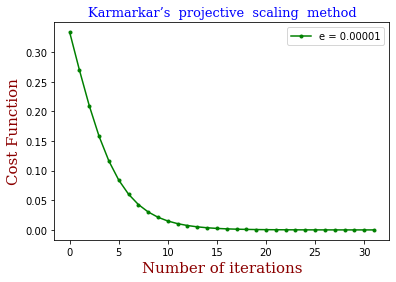

In [ ]:
font1 = {'family':'serif','color':'blue','size':13}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Karmarkar’s  projective  scaling  method", fontdict = font1)
plt.xlabel("Number of iterations", fontdict = font2)
plt.ylabel("Cost Function", fontdict = font2)

# plt.title("Karmarkar’s  projective  scaling  method")
# plt.xlabel("Number of iterations")
# plt.ylabel("Cost Function")
plt.plot(count_hist,cost_hist,'.-g',label='e = 0.00001')
plt.legend()
# plt.savefig("karmarkar_e_0.00001.png")

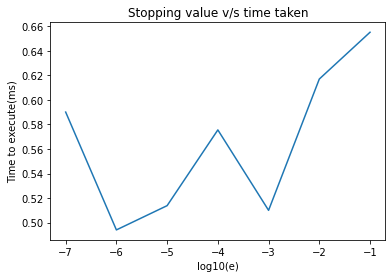

In [ ]:
plt.title("Stopping value v/s time taken")
plt.xlabel("log10(e)")
plt.ylabel("Time to execute(ms)")

plt.plot(np.log10(e_list),time_hist)
plt.savefig("time_graph.png")

In [ ]:
np.log10(e_list)

array([-1., -2., -3., -4., -5., -6., -7.])

###  Alternate implementations

In [ ]:
def concat(l1,l2):
  ''' function to concatenate 2 list of lists, l1 and l2 here, to a single list of lists'''
  temp = l1.copy()
  for i in range(len(l2)):
    temp.append(l2[i]) 
  return temp

def cost_array(coords, prop_const=1, norm='euclidean',lower_cost=1,upper_cost=10):
  ''' function to calculate a flattened cost matrix from the coordinates of the nodes and the type of norm specified'''
  a = []
  if norm == 'euclidean':
    for i in range(len(coords)):
      for j in range(len(coords)):
        if i != j:
          a.append(prop_const*np.linalg.norm(np.asarray(coords[i])-np.asarray(coords[j])))
    return a
  elif norm == 'random':
    return [lower_cost + (upper_cost-lower_cost)*random.random() for i in range(len(coords)*(len(coords)-1))]
  else:
    print('CHOOSE SUITABLE NORM FOR COST')

In [ ]:
# In the following implentations, the variable array consists separate variables for transport between 'node1 and node2' and 'node2 to node1'. For example:
# consider a case of two 1 supply node, node1 and 2 demand nodes, node2 and node3. So the variable array will be x = [x12, x13, x21, x23, x31, x32] where xij represents volume 
# of water transported from node i to node j

def karmarkar_homogenous(A,c,L=20):
  ''' Solves the homogeneous case, Ax = 0; where cost to be minimised is c^T*x and sum of elements of x is 1; L is some large number related to stopping criteria'''

  n_v = A.shape[1] # size of variable array
  D = np.zeros((n_v ,n_v ), dtype=float)
  alpha = (n_v - 1 )/(3*(n_v))
  r = 1/(np.sqrt((n_v)*(n_v -1 )))
  x = np.ones([n_v,1])*(1/n_v)
  
  count = 0
  x_0 = x.copy() # initial starting point
  M = L
  Z_old, Z_new = 0,0 # to store costs 

  while count <=1 or Z_old-Z_new > 2**(-M):
    for i in range(0,n_v):
      D[i,i] = x[i,0]
    # print('D=',D)
    P = np.append(np.matmul(A,D),np.ones((1,x.shape[0])), axis=0)
    # print(P.shape)
    C_ = np.matmul(c.T,D)
    # print('PP^T=',np.linalg.det(np.matmul(P,P.T)))
    
    if np.linalg.det(np.matmul(P,P.T)) == 0:
      print('Singularity detected')
      break

    # print('\n',np.linalg.det(np.matmul(P,P.T)))
    P_ = np.matmul(np.matmul(P.T, linalg.inv(np.matmul(P,P.T))) ,P)
    C_p = np.matmul(np.identity(P.shape[1]) - P_ , C_.T)

    C_p_norm = linalg.norm(C_p)
    # print('C_p_norm=',C_p_norm)
  
    y_new = x_0 - alpha*r*(1/C_p_norm)*C_p
  
    x = np.matmul(D,y_new)/np.matmul(np.ones((1,n_v),dtype=float), np.matmul(D,y_new))

    Z_old = Z_new
    Z_new = float(np.matmul(c.T,x))
    count += 1
    # print('Z=',Z_new)
    # print('x=',x)

  # print('final objective function value =', np.matmul(c.T,x))
  # print('optimal x =','\n', x)
  return x, np.matmul(c.T,x)

def solve_karmarkar_3(supply_coords,demand_coords,source,dest,prop_const=1, norm='euclidean',flow_bound_upper=100):
'''solves the non-homogeneous case, where the inputs are same as those mentioned in benchmarking code'''
  
  coords = concat(supply_coords, demand_coords) # concatenating supply and demand coordinates to a single list of lists
  n = len(coords)
  n_v = n*(n-1)
  c = np.asarray(cost_array(coords)).reshape(n_v,1) # flattened cost matrix
  c_actual = c.copy()

  # start = time.time()

  A = np.zeros([n,n_v]) #n = no. of nodes; n_v = no. of variables

  for i in range(n):
      for j in range(n):
        if i != j:
          if i<j:
            if (i==0 and j==1) or (i!=0 and j==0):
              A[i,(n-1)*i + j-1], A[i,(n-1)*j + i] = 1,-1
            else:
              A[i,(n-1)*i + j-1], A[i,(n-1)*j + i] = 1,-1
          else:
            if (i==0 and j==1) or (i!=0 and j==0):
              A[i,(n-1)*i + j], A[i,(n-1)*j + i-1] = 1,-1
            else:
              A[i,(n-1)*i + j], A[i,(n-1)*j + i-1] = 1,-1

  # print(A)

  b = np.asarray(source + list(map(lambda x: -x, dest))).reshape(n,1)

  a_interior = 0.1*np.ones([n_v,1],dtype=float)

  for col in range(A.shape[1]):
    A[:,col] = a_interior[col,0]*A[:,col]
    c[col,0] = a_interior[col,0]*c[col,0]
  A = np.append(A,-b,axis=1)
  c = np.append(c,[[0]],axis=0)
  n_v += 1

  x = karmarkar_homogenous(A,c,L=n_v*flow_bound_upper)[0]

  x_actual = []
  for i in range(n_v-1):
    x_actual.append(a_interior[i,0]*x[i,0]/x[-1,0])
  # retrieving variable matrix(xij) from the flattened version x 
  xij = np.zeros([n,n])
  ind = 0
  for row in range(n):
    for col in range(n):
      if row != col:
        xij[row][col] = x_actual[ind]
        ind += 1
  # keeping only the edges between supply and demand nodes
  xij = np.asarray(xij)[:len(supply_coords), -len(demand_coords):].tolist()
  print('final objective function value =', np.matmul(c_actual.T,np.asarray(x_actual).reshape(n_v-1,1)))
  print('optimal x =','\n', np.asarray(xij))

### Homogeneous example

In [ ]:
A1 = np.asarray([0,1,-1]).reshape(1,3)
c1 = np.asarray([1,0,0]).reshape(3,1)
solution, cost = karmarkar_homogenous(A1,c1,L=100)
print('final objective function value =', cost)
print('optimal x =','\n', solution)

final objective function value = [[1.29627053e-30]]
optimal x = 
 [[1.29627053e-30]
 [5.00000000e-01]
 [5.00000000e-01]]


### Non-homogeneous example

In [ ]:
source = [8,4,12,6]
dest = [3,5,10,7,5]
supply_coords = [[7., 6.],[2., 7.],[1., 6.],[6., 8.]]
demand_coords = [[3., 9.],[4., 6.],[5., 7.],[5., 3.],[2., 9.]]

source1 = [13,12,10,5,3,8,1,2,17]
dest1 = [9, 16,8,9,2,5,18,2,2]
supply_coords1 = []
demand_coords1 = []
#randomly initializing the coordinates
for node_s in range(len(source1)):
  supply_coords1.append([50*random.random(),50*random.random()])
for node_d in range(len(dest1)):
  demand_coords1.append([50*random.random(),50*random.random()])

solve_karmarkar_3(supply_coords,demand_coords,source,dest)
# solve_karmarkar_3(supply_coords1,demand_coords1,source1,dest1)

final objective function value = [[30.67299734]]
optimal x = 
 [[0.11479808 0.1163943  0.11520114 0.11892251 0.1162638 ]
 [0.11935417 0.11983567 0.1177097  0.12102498 0.1214647 ]
 [0.12086768 0.12172281 0.11934897 0.12337493 0.12311791]
 [0.114277   0.11491095 0.11409977 0.11649311 0.11569221]]
